In [261]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.transforms as transforms
from scipy.stats import skewtest

plt.rc('ytick', labelsize=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('font', size=20) 




In [150]:
# Load data
df = pd.read_csv("portfolio_metrics_historical_data.csv")
df

,Unnamed: 0,.\Historical_Prices_Csv\usdollar_investing.csv,.\Historical_Prices_Csv\spdr-gold-trust_investing.csv,.\Historical_Prices_Csv\ishares-global-corporate-bond-$_investing.csv,.\Historical_Prices_Csv\db-x-trackers-ii-global-sovereign-5_investing.csv,.\Historical_Prices_Csv\amundi-msci-wrld-ae-c_investing.csv,RETURN,VOLAT
0,0,1.0,0.0,0.0,0.0,0.0,-6.691566,3.273306
1,1,0.8,0.2,0.0,0.0,0.0,1.626032,1.550114
2,2,0.6,0.4,0.0,0.0,0.0,8.572617,3.200567
3,3,0.4,0.6,0.0,0.0,0.0,14.461361,5.037489
4,4,0.2,0.8,0.0,0.0,0.0,19.516803,6.598223
...,...,...,...,...,...,...,...,...
121,121,0.2,0.0,0.0,0.0,0.8,3.830809,6.784478
122,122,-0.0,0.2,0.0,0.0,0.8,8.063449,7.018556
123,123,-0.0,0.0,0.2,0.0,0.8,5.023717,7.203565
124,124,-0.0,0.0,0.0,0.2,0.8,3.927727,5.606045


In [220]:
return_values = df.RETURN.values

In [149]:
# Calculate important values
minimum = df.RETURN.values.min()
maximum = df.RETURN.values.max()
mean = df.RETURN.values.mean()
median = np.median(df.RETURN.values)
minimum, maximum, mean, median

(-6.691565515094929, 23.90413337964573, 5.54497688306094, 4.172537246462637)

In [249]:
# Calculate percentage of positive and negative return values
share_negative_values = df.RETURN[df.RETURN < 0].value_counts().sum() / df.RETURN.count()
share_positive_values = df.RETURN[df.RETURN > 0].value_counts().sum() / df.RETURN.count()

share_negative_values, share_positive_values

(0.12698412698412698, 0.873015873015873)

In [147]:
# Calculate bins for histogram in steps of five
def calculate_bins_for_histogram(data):
    return range(5*math.floor(minimum/5), 5*math.ceil(maximum/5)+5,5)


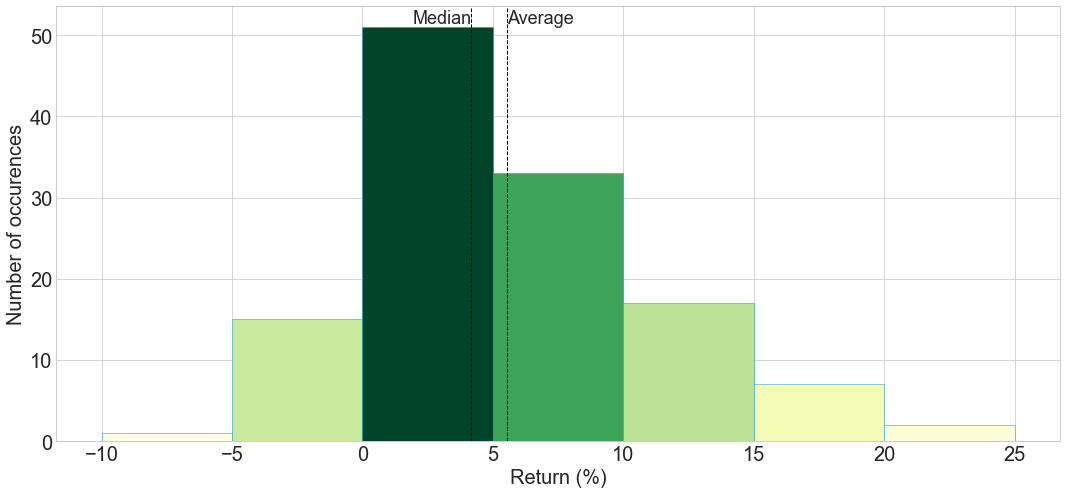

In [266]:
# Plotting the distribution as a histogramm 

bins=calculate_bins_for_histogram(return_values)

plt.figure(figsize=(18,8)) 

n,bins,patches = plt.hist(return_values, bins=bins, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)

nmax = np.max(n)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
plt.axvline(median, color='k', linestyle='dashed', linewidth=1)
plt.text(mean, nmax*1.01, 'Average', fontsize=18)
plt.text(median, nmax*1.01, 'Median', horizontalalignment='right', fontsize=18)

for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', plt.cm.get_cmap('YlGn')(n[i]/max(n)))
    
# plt.title('Histogramm - Return distribution of porfolios', fontsize=20) 
plt.xlabel('Return (%)') 
plt.ylabel('Number of occurences') 

plt.show()

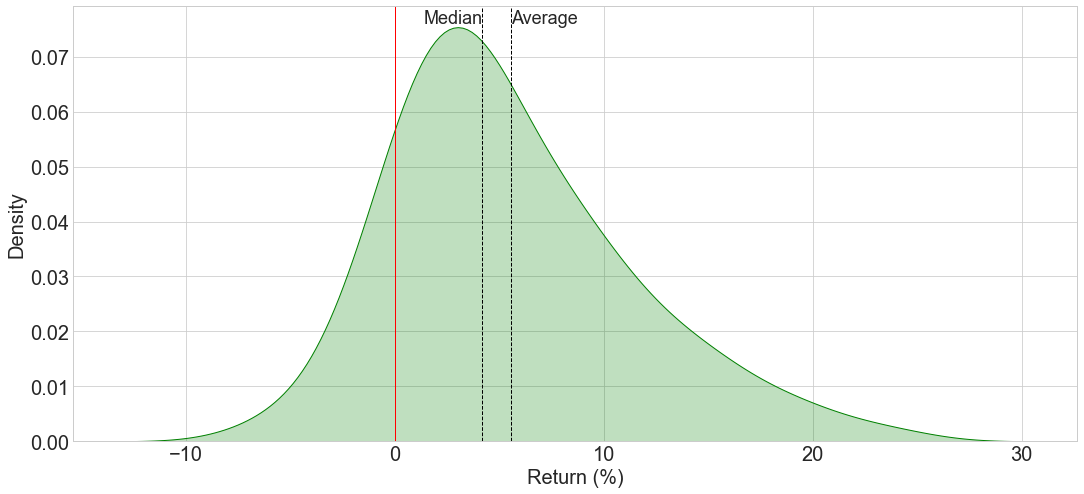

In [267]:
# Plotting the distribution as a Kernel Density Plot
plt.figure(figsize=(18,8)) 
n = sns.kdeplot(data=return_values,color='green',shade=True)

nmax = np.max(n)
plt.axvline(0, color='r', linestyle='-', linewidth=1)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
plt.axvline(median, color='k', linestyle='dashed', linewidth=1)
plt.text(mean, 0.076, 'Average', fontsize=18)
plt.text(median, 0.076, 'Median',  horizontalalignment='right', fontsize=18)

# plt.title('Kernel Density Plot - Return distribution of porfolios', fontsize=16) 
plt.xlabel('Return (%)') 
plt.ylabel('Density') 

plt.show()

In [171]:
def getColorsForBars(values):
    colorsValue = []
    for value in values:
        if value < 0:
            colorsValue.append('red')
        else:
            colorsValue.append('green')


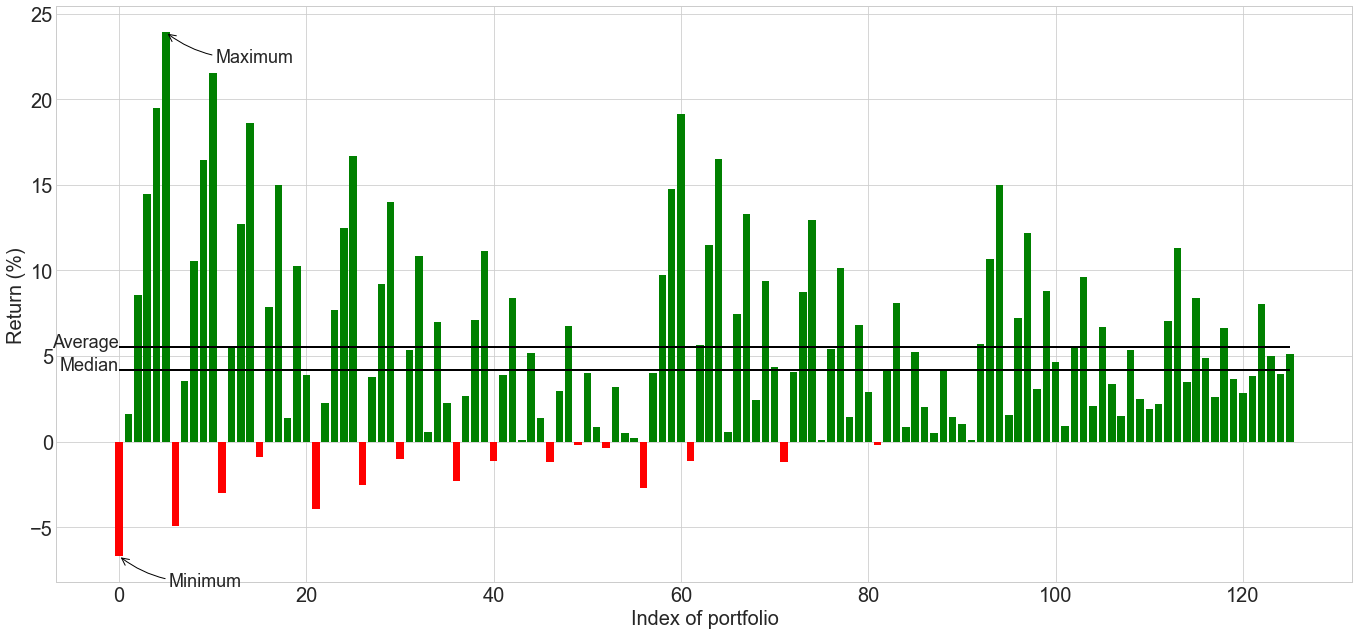

In [268]:
# Plotting all portfolios return as a bar chart

fig = plt.figure(figsize=(18,8))

ax = fig.add_axes([0,0,1,1])
colors = ["red" if i < 0 else "green" for i in return_values]
ax.bar(df.RETURN.index.values,df.RETURN, color=colors)

ax.hlines(y=mean, xmin=df.index.values.min(), xmax=df.index.values.max(), linewidth=2, color='black')
ax.hlines(y=median, xmin=df.index.values.min(), xmax=df.index.values.max(), linewidth=2, color='black')
plt.text(0, mean, 'Average', horizontalalignment='right', fontsize=18)
plt.text(0, median, 'Median',  horizontalalignment='right', fontsize=18)


ax.annotate("Minimum", xy=(df[df.RETURN==minimum].index.values, minimum),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"),fontsize=18)

ax.annotate("Maximum", xy=(df[df.RETURN==maximum].index.values, maximum),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"),fontsize=18)

# plt.title('Bar chart - Returns', fontsize=16) 
plt.xlabel('Index of portfolio') 
plt.ylabel('Return (%)') 

plt.show()

In [233]:
# Calculate skewness
skewness = df.RETURN.skew()
skewness

0.775185637927168

In [ ]:
# was ist guter Return - durchschnittlicher REtunr -- Quelle suchen


Based on the information provided, we can see that the minimum return is negative (-6.69), while the maximum return is positive (23.90). The mean return is also positive (5.54), indicating that, on average, the returns are positive. However, the median return is 4.17, which is lower than the mean, suggesting that there may be some negative returns pulling down the overall average.

Given this information, it is difficult to say definitively whether it is more probable to obtain a positive or negative return without additional context. However, based solely on the summary statistics provided, it appears that there is a greater likelihood of positive returns, as the maximum return is much higher than the minimum return, and the mean return is positive. However, it is important to note that the distribution of returns may be skewed or have other characteristics that could affect the probability of positive or negative returns. A more detailed analysis, including a visualization of the distribution of returns, would be needed to make a more accurate assessment.